# **PHISHGUARD: A Comprehensive Framework for Phishing Website Detection Using Machine Learning and Ensemble Models**

## Models

A range of machine learning models will be explored, from traditional algorithms to advanced ensemble models:

- Support Vector Machine (SVM)
- Random Forest
- AdaBoost
- Gradient Boosting
- XGBoost
- LightGBM
- CatBoost

# Importing Required Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import warnings

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Filter warnings
warnings.filterwarnings('ignore')

## Dataset 01

The dataset is borrowed from [Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .](https://archive.ics.uci.edu/dataset/327/phishing+websites)

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


- samples: 11055
- features: 30

In [2]:
#Loading data into dataframe

file_path = 'data/dataset1.csv'
data1 = pd.read_csv(file_path)


In [3]:
data1.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
data1.shape

(11055, 32)

In [5]:
list(data1.columns)

['index ',
 'having_IPhaving_IP_Address ',
 'URLURL_Length ',
 'Shortining_Service ',
 'having_At_Symbol ',
 'double_slash_redirecting ',
 'Prefix_Suffix ',
 'having_Sub_Domain ',
 'SSLfinal_State ',
 'Domain_registeration_length ',
 'Favicon ',
 'port ',
 'HTTPS_token ',
 'Request_URL ',
 'URL_of_Anchor ',
 'Links_in_tags ',
 'SFH ',
 'Submitting_to_email ',
 'Abnormal_URL ',
 'Redirect ',
 'on_mouseover ',
 'RightClick ',
 'popUpWidnow ',
 'Iframe ',
 'age_of_domain ',
 'DNSRecord ',
 'web_traffic ',
 'Page_Rank ',
 'Google_Index ',
 'Links_pointing_to_page ',
 'Statistical_report ',
 'Result']

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   index                         11055 non-null  int64
 1   having_IPhaving_IP_Address    11055 non-null  int64
 2   URLURL_Length                 11055 non-null  int64
 3   Shortining_Service            11055 non-null  int64
 4   having_At_Symbol              11055 non-null  int64
 5   double_slash_redirecting      11055 non-null  int64
 6   Prefix_Suffix                 11055 non-null  int64
 7   having_Sub_Domain             11055 non-null  int64
 8   SSLfinal_State                11055 non-null  int64
 9   Domain_registeration_length   11055 non-null  int64
 10  Favicon                       11055 non-null  int64
 11  port                          11055 non-null  int64
 12  HTTPS_token                   11055 non-null  int64
 13  Request_URL                   1

In [7]:
# nunique value in columns

data1.nunique()

index                           11055
having_IPhaving_IP_Address          2
URLURL_Length                       3
Shortining_Service                  2
having_At_Symbol                    2
double_slash_redirecting            2
Prefix_Suffix                       2
having_Sub_Domain                   3
SSLfinal_State                      3
Domain_registeration_length         2
Favicon                             2
port                                2
HTTPS_token                         2
Request_URL                         2
URL_of_Anchor                       3
Links_in_tags                       3
SFH                                 3
Submitting_to_email                 2
Abnormal_URL                        2
Redirect                            2
on_mouseover                        2
RightClick                          2
popUpWidnow                         2
Iframe                              2
age_of_domain                       2
DNSRecord                           2
web_traffic 

In [8]:
# We can see that there are no missing values in the Dataset
for col in data1.columns:
    unique_value_list = data1[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {data1[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

index  has 11055 unique values
having_IPhaving_IP_Address  contains:			[-1  1]
URLURL_Length  contains:			[ 1  0 -1]
Shortining_Service  contains:			[ 1 -1]
having_At_Symbol  contains:			[ 1 -1]
double_slash_redirecting  contains:			[-1  1]
Prefix_Suffix  contains:			[-1  1]
having_Sub_Domain  contains:			[-1  0  1]
SSLfinal_State  contains:			[-1  1  0]
Domain_registeration_length  contains:			[-1  1]
Favicon  contains:			[ 1 -1]
port  contains:			[ 1 -1]
HTTPS_token  contains:			[-1  1]
Request_URL  contains:			[ 1 -1]
URL_of_Anchor  contains:			[-1  0  1]
Links_in_tags  contains:			[ 1 -1  0]
SFH  contains:			[-1  1  0]
Submitting_to_email  contains:			[-1  1]
Abnormal_URL  contains:			[-1  1]
Redirect  contains:			[0 1]
on_mouseover  contains:			[ 1 -1]
RightClick  contains:			[ 1 -1]
popUpWidnow  contains:			[ 1 -1]
Iframe  contains:			[ 1 -1]
age_of_domain  contains:			[-1  1]
DNSRecord  contains:			[-1  1]
web_traffic  contains:			[-1  0  1]
Page_Rank  contains:			[-1  1]
Google

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

In [9]:
#Replacing -1 with 0 
data1['Result']=data1['Result'].replace(-1,0)

In [10]:
# Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling
data1 = data1.drop(data1.columns[0],axis=1)
data1

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,0
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,0
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,0


In [11]:
#description of dataset

data1.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IPhaving_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URLURL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


data_set.append 09 OBSERVATIONS:
1. There are 11055 instances and 31 features in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

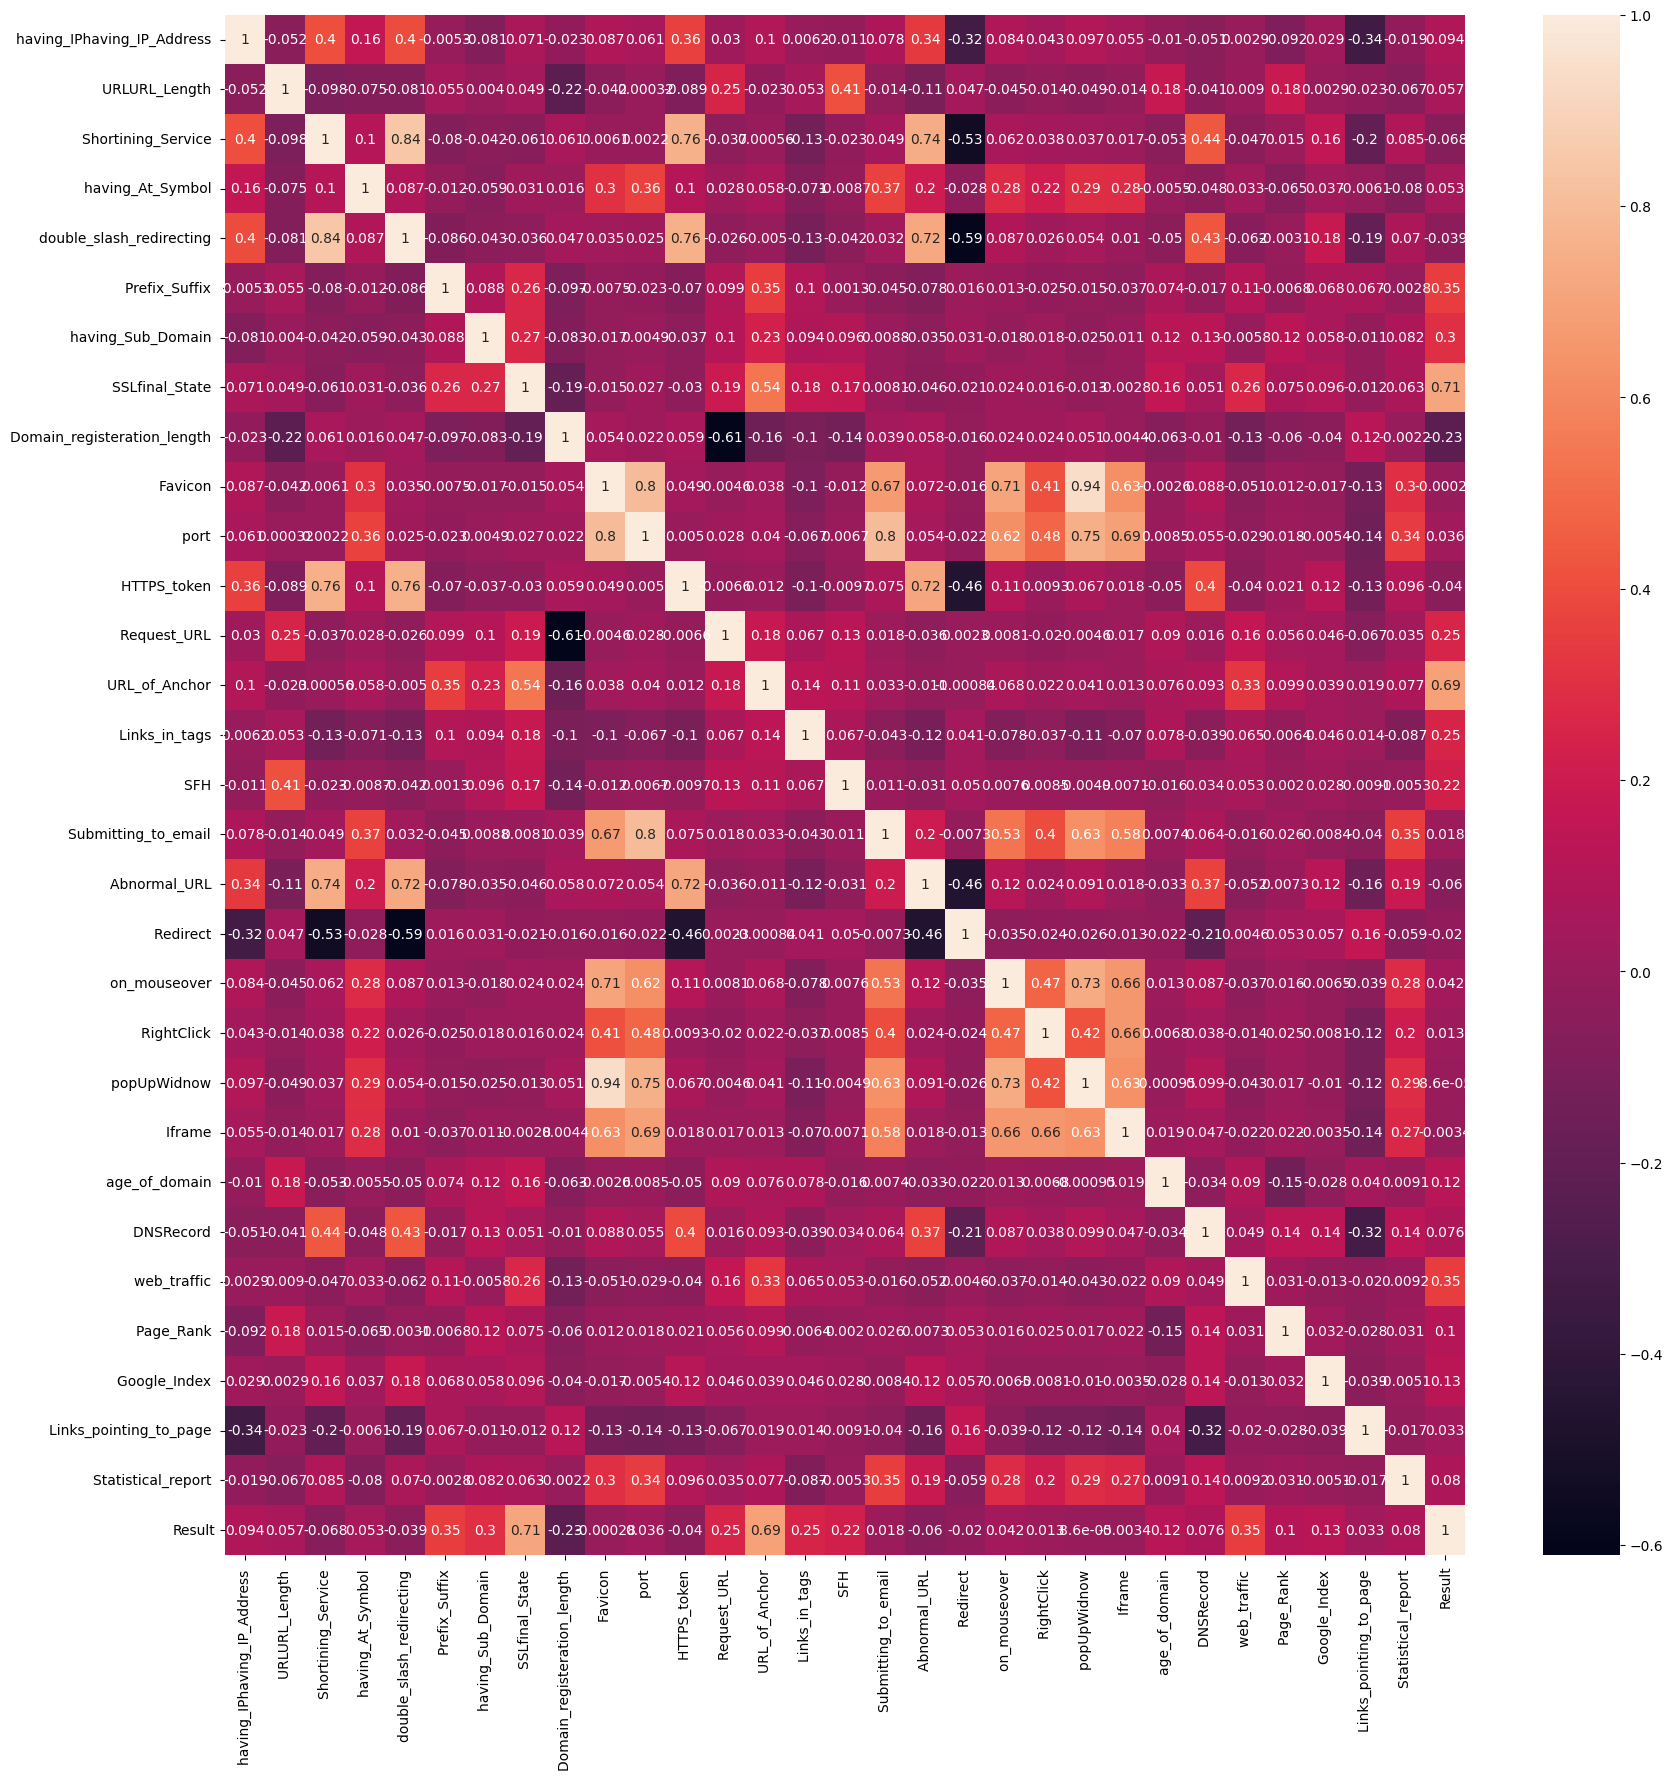

In [12]:
#Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(), annot=True)
plt.show()

### Distribution of Phishing and Legitimate Sites in Dataset

Result
1    6157
0    4898
Name: count, dtype: int64


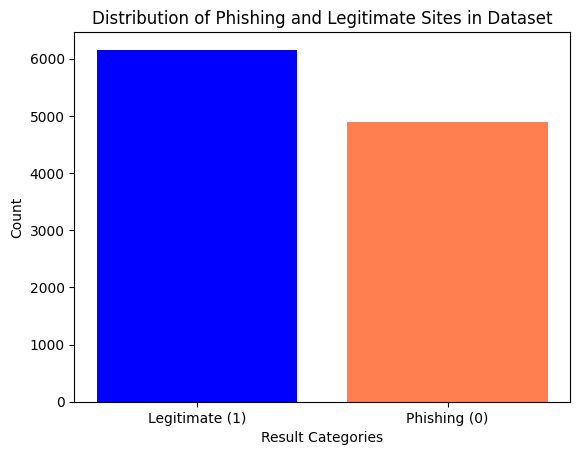

In [13]:
# Count the occurrences of each category in the 'Result' column
result_counts = data1['Result'].value_counts()
print(data1['Result'].value_counts())
# Defining colors for the bar chart based on the index of result_counts
# (assuming -1 for Phishing and 1 for Legitimate)
colors = ['Coral' if index == 0 else 'blue' for index in result_counts.index]

# Define labels for the categories
labels = ['Legitimate (1)','Phishing (0)']

# Create an enhanced bar chart
plt.bar(labels, result_counts.values, color=colors)
plt.xlabel('Result Categories')
plt.ylabel('Count')
plt.title('Distribution of Phishing and Legitimate Sites in Dataset')
plt.show()

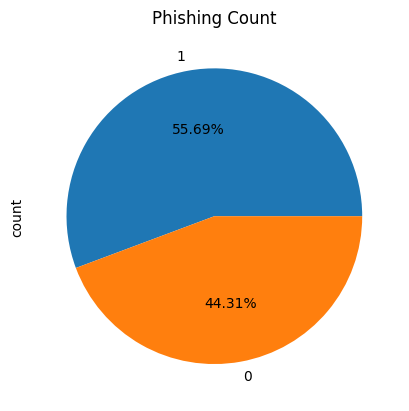

In [14]:
# Phishing Count in pie chart

data1['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

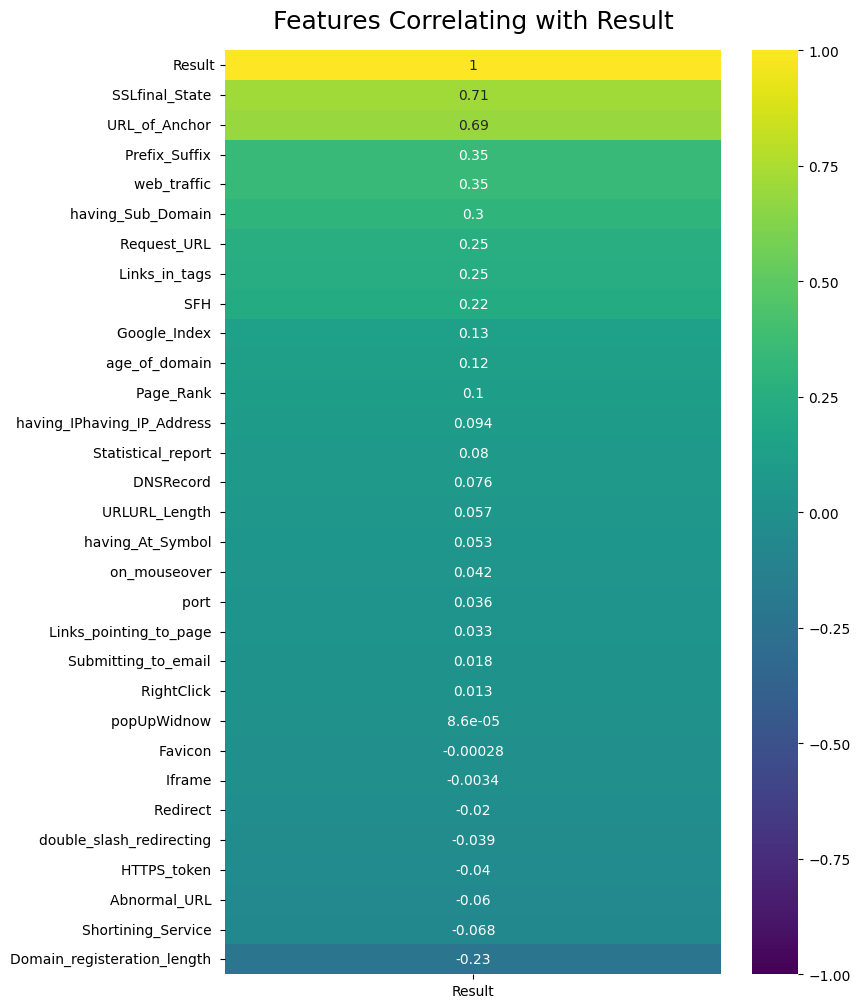

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data1.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

In [16]:
# Creating holders to store the model performance results
ML_Model = []
ML_Config = []
accuracy = []
f1_score = []
recall = []
precision = []
auc_roc = []  # Adding a holder for AUC-ROC

# Function to call for storing the results
def storeResults(model,config, a, b, c, d, e):
    ML_Model.append(model)
    ML_Config.append(config)
    accuracy.append(round(a, 6))
    f1_score.append(round(b, 6))
    recall.append(round(c, 6))
    precision.append(round(d, 6))
    auc_roc.append(round(e, 6))

---

# Support Vector Machine : Classifier



In [17]:
# Assuming X and y are your features and labels
X = data1.drop(["Result"],axis =1)
y = data1["Result"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization (but before oversampling)
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Configuration 3: After SMOTE (before normalization)
configurations.append(('After SMOTE', X_train_balanced, X_test, y_train_balanced))

# Step 4: Apply SMOTE followed by Normalization
X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized_smote = scaler.transform(X_test)  # Apply the same scaling to the test set

# Configuration 4: After SMOTE and Normalization
configurations.append(('SMOTE and Normalization', X_train_balanced_normalized, X_test_normalized_smote, y_train_balanced))

# Step 5: Feature Selection and PCA after SMOTE + Normalization
# 5.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
    score = cross_val_score(SVC(kernel='linear'), X_train_kbest, y_train_balanced, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
X_test_kbest = kbest.transform(X_test_normalized_smote)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train_balanced))

# 5.2: RFECV with SVM
print("\n=== RFECV Feature Selection with SVM ===")
svm_estimator = SVC(kernel='linear')  # Using a linear kernel for feature selection

rfecv = RFECV(estimator=svm_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train_balanced)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=svm_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train_balanced)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train_balanced))

# 5.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train_balanced))

# Step 6: Run SVM with Hyperparameter Tuning on different configurations
print("\n=== SVM Model Performance with Hyperparameter Tuning ===")

# # Defining an expanded parameter grid for hyperparameter tuning
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Add different C values for regularization
#     'gamma': [1, 0.1, 0.01, 0.001],  # Explore a wider range of gamma values
#     'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Include additional kernels for non-linear classification
# }
# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'C': [10, 100],  # Add different C values for regularization
    'gamma': [0.1],  # Explore a wider range of gamma values
    'kernel': ['rbf']  # Include additional kernels for non-linear classification
}
for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning SVM with {name} configuration...")

    # GridSearchCV to find the best parameters for the SVC model
    svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)  # Set probability=True for AUC-ROC calculation

    # Fitting the model for grid search with the training data
    svc.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_svc = svc.predict(X_train_cfg)
    y_test_svc = svc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_svc_proba = svc.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_svc_proba = svc.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Support Vector Machine model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_svc),
            metrics.accuracy_score(y_test, y_test_svc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_svc),
            metrics.f1_score(y_test, y_test_svc),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_svc),
            metrics.recall_score(y_test, y_test_svc),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_svc),
            metrics.precision_score(y_test, y_test_svc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_svc_proba),
            metrics.roc_auc_score(y_test, y_test_svc_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nSupport Vector Machine Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # # Computing the classification report of the model
    # print("\nClassification Report for the SVM Model:\n")
    # print(metrics.classification_report(y_test, y_test_svc))

    # Storing the results, now including the AUC-ROC score
    storeResults('Support Vector Machine',
                 name,
                 metrics.accuracy_score(y_test, y_test_svc),
                 metrics.f1_score(y_test, y_test_svc),
                 metrics.recall_score(y_test, y_test_svc),
                 metrics.precision_score(y_test, y_test_svc),
                 metrics.roc_auc_score(y_test, y_test_svc_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(svc.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 29

=== RFECV Feature Selection with SVM ===
Optimal number of features selected by RFECV: 27

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 21

=== SVM Model Performance with Hyperparameter Tuning ===

Running SVM with Original Data configuration...

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.989711  0.990744 0.993472   0.988030 0.997797
    Test  0.966079  0.970367 0.978486   0.962382 0.988895
Best hyperparameters found by GridSearchCV:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Running SVM with Normalized Data configuration...

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.980665  0.982627 0.986536   0.978749 0.997710
    Test  0.964270  0.968787 0.976892   0.960815 0.991743
Best hyperparameters found b

# Random Forest : Classifier


In [21]:
# Assuming X and y are your features and labels
X = data1.drop(["Result"], axis=1)
y = data1["Result"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization (but before oversampling)
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Configuration 3: After SMOTE (before normalization)
configurations.append(('After SMOTE', X_train_balanced, X_test, y_train_balanced))

# Step 4: Apply SMOTE followed by Normalization
X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized_smote = scaler.transform(X_test)  # Apply the same scaling to the test set

# Configuration 4: After SMOTE and Normalization
configurations.append(('SMOTE and Normalization', X_train_balanced_normalized, X_test_normalized_smote, y_train_balanced))

# Step 5: Feature Selection and PCA after SMOTE + Normalization
# 5.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
    score = cross_val_score(RandomForestClassifier(), X_train_kbest, y_train_balanced, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
X_test_kbest = kbest.transform(X_test_normalized_smote)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train_balanced))

# 5.2: RFECV with RandomForestClassifier
print("\n=== RFECV Feature Selection with Random Forest ===")
rf_estimator = RandomForestClassifier()

rfecv = RFECV(estimator=rf_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train_balanced)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=rf_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train_balanced)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train_balanced))

# 5.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train_balanced))

# Step 6: Run RandomForestClassifier with Hyperparameter Tuning on different configurations
print("\n=== Random Forest Model Performance with Hyperparameter Tuning ===")

# # Defining an expanded parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, 50, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'criterion': ['gini', 'entropy']
# }
# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2'],
    'bootstrap': [False],
    'criterion': ['gini', 'entropy']
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning Random Forest with {name} configuration...")

    # GridSearchCV to find the best parameters for the RandomForestClassifier
    rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)  # 5-fold cross-validation

    # Fitting the model for grid search with the training data
    rf.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_rf = rf.predict(X_train_cfg)
    y_test_rf = rf.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_rf_proba = rf.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_rf_proba = rf.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Random Forest model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_rf),
            metrics.accuracy_score(y_test, y_test_rf),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_rf),
            metrics.f1_score(y_test, y_test_rf),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_rf),
            metrics.recall_score(y_test, y_test_rf),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_rf),
            metrics.precision_score(y_test, y_test_rf),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_rf_proba),
            metrics.roc_auc_score(y_test, y_test_rf_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nRandom Forest Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # # Computing the classification report of the model
    # print("\nClassification Report for the Random Forest Model:\n")
    # print(metrics.classification_report(y_test, y_test_rf))

    # Storing the results, now including the AUC-ROC score
    storeResults('Random Forest',
                 name,
                 metrics.accuracy_score(y_test, y_test_rf),
                 metrics.f1_score(y_test, y_test_rf),
                 metrics.recall_score(y_test, y_test_rf),
                 metrics.precision_score(y_test, y_test_rf),
                 metrics.roc_auc_score(y_test, y_test_rf_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(rf.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 30

=== RFECV Feature Selection with Random Forest ===
Optimal number of features selected by RFECV: 22

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 18

=== Random Forest Model Performance with Hyperparameter Tuning ===

Running Random Forest with Original Data configuration...

Random Forest Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.990615  0.991538 0.992044   0.991033 0.999774
    Test  0.965626  0.969889 0.975299   0.964539 0.991125

Classification Report for the Random Forest Model:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.97      0.97      0.97

# Gradient Boosting Classifier

In [31]:
# Assuming X and y are your features and labels
X = data1.drop(["Result"], axis=1)
y = data1["Result"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization (but before oversampling)
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Configuration 3: After SMOTE (before normalization)
configurations.append(('After SMOTE', X_train_balanced, X_test, y_train_balanced))

# Step 4: Apply SMOTE followed by Normalization
X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized_smote = scaler.transform(X_test)  # Apply the same scaling to the test set

# Configuration 4: After SMOTE and Normalization
configurations.append(('SMOTE and Normalization', X_train_balanced_normalized, X_test_normalized_smote, y_train_balanced))

# Step 5: Feature Selection and PCA after SMOTE + Normalization
# 5.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
    score = cross_val_score(GradientBoostingClassifier(), X_train_kbest, y_train_balanced, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
X_test_kbest = kbest.transform(X_test_normalized_smote)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train_balanced))

# 5.2: RFECV with GradientBoostingClassifier
print("\n=== RFECV Feature Selection with Gradient Boosting ===")
gbc_estimator = GradientBoostingClassifier()

rfecv = RFECV(estimator=gbc_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train_balanced)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=gbc_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train_balanced)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train_balanced))

# 5.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train_balanced))

# Step 6: Run GradientBoostingClassifier with Hyperparameter Tuning on different configurations
print("\n=== Gradient Boosting Model Performance with Hyperparameter Tuning ===")

# # Defining a parameter grid for hyperparameter tuning
# param_grid = {
#     'learning_rate': [0.1, 0.7, 0.01, 0.001],
#     'n_estimators': [100, 200, 300,400],
#     'max_depth': [3, 4, 5,6,7]
# }
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 6, 7]
}
for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning Gradient Boosting with {name} configuration...")

    # GridSearchCV to find the best parameters for the GradientBoostingClassifier
    gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    gbc.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_gbc = gbc.predict(X_train_cfg)
    y_test_gbc = gbc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_gbc_proba = gbc.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_gbc_proba = gbc.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Gradient Boosting model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_gbc),
            metrics.accuracy_score(y_test, y_test_gbc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_gbc),
            metrics.f1_score(y_test, y_test_gbc),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_gbc),
            metrics.recall_score(y_test, y_test_gbc),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_gbc),
            metrics.precision_score(y_test, y_test_gbc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_gbc_proba),
            metrics.roc_auc_score(y_test, y_test_gbc_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nGradient Boosting Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('Gradient Boosting',
                 name,
                 metrics.accuracy_score(y_test, y_test_gbc),
                 metrics.f1_score(y_test, y_test_gbc),
                 metrics.recall_score(y_test, y_test_gbc),
                 metrics.precision_score(y_test, y_test_gbc),
                 metrics.roc_auc_score(y_test, y_test_gbc_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(gbc.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 29

=== RFECV Feature Selection with Gradient Boosting ===
Optimal number of features selected by RFECV: 23

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 19

=== Gradient Boosting Model Performance with Hyperparameter Tuning ===

Running Gradient Boosting with Original Data configuration...

Gradient Boosting Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.988467  0.989636 0.993472   0.985830 0.999563
    Test  0.971054  0.974803 0.986454   0.963424 0.996357
Best hyperparameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

Running Gradient Boosting with Normalized Data configuration...

Gradient Boosting Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.989711  0.990745 0.993676   0.987832 0.999713
    Test  0.972863  0.

# CatBoost Classifier

In [44]:
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn import metrics
import pandas as pd

# Assuming X and y are your features and labels
X = data1.drop(["Result"], axis=1)
y = data1["Result"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Configuration 3: After SMOTE (before normalization)
configurations.append(('After SMOTE', X_train_balanced, X_test, y_train_balanced))

# Step 4: Apply SMOTE followed by Normalization
X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized_smote = scaler.transform(X_test)  # Apply the same scaling to the test set

# Configuration 4: After SMOTE and Normalization
configurations.append(('SMOTE and Normalization', X_train_balanced_normalized, X_test_normalized_smote, y_train_balanced))

# Step 5: Feature Selection and PCA after SMOTE + Normalization
# 5.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
    score = cross_val_score(CatBoostClassifier(silent=True), X_train_kbest, y_train_balanced, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
X_test_kbest = kbest.transform(X_test_normalized_smote)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train_balanced))

# 5.2: RFECV with CatBoostClassifier
print("\n=== RFECV Feature Selection with CatBoost ===")
cat_estimator = CatBoostClassifier(silent=True)

rfecv = RFECV(estimator=cat_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train_balanced)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=cat_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train_balanced)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train_balanced))

# 5.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train_balanced))

# Step 6: Run CatBoostClassifier with Hyperparameter Tuning on different configurations
print("\n=== CatBoost Model Performance with Hyperparameter Tuning ===")

# # Defining a parameter grid for hyperparameter tuning
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.05],
#     'depth': [4, 6, 8, 10],
#     'iterations': [100, 200, 300, 400, 500]
# }

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1],
    'depth': [6, 8, 10],
    'iterations': [200, 300, 400]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning CatBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the CatBoostClassifier
    cat = GridSearchCV(CatBoostClassifier(silent=True), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    cat.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_cat = cat.predict(X_train_cfg)
    y_test_cat = cat.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_cat_proba = cat.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_cat_proba = cat.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the CatBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_cat),
            metrics.accuracy_score(y_test, y_test_cat),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_cat),
            metrics.f1_score(y_test, y_test_cat),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_cat),
            metrics.recall_score(y_test, y_test_cat),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_cat),
            metrics.precision_score(y_test, y_test_cat),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_cat_proba),
            metrics.roc_auc_score(y_test, y_test_cat_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nCatBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('CatBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_cat),
                 metrics.f1_score(y_test, y_test_cat),
                 metrics.recall_score(y_test, y_test_cat),
                 metrics.precision_score(y_test, y_test_cat),
                 metrics.roc_auc_score(y_test, y_test_cat_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(cat.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 30

=== RFECV Feature Selection with CatBoost ===
Optimal number of features selected by RFECV: 28

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 21

=== CatBoost Model Performance with Hyperparameter Tuning ===

Running CatBoost with Original Data configuration...

CatBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.988580  0.989728 0.992656   0.986818 0.999576
    Test  0.971506  0.975148 0.984861   0.965625 0.996244
Best hyperparameters found by GridSearchCV:
{'depth': 6, 'iterations': 400, 'learning_rate': 0.1}

Running CatBoost with Normalized Data configuration...

CatBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.988580  0.989728 0.992656   0.986818 0.999576
    Test  0.971506  0.975148 0.984861   0.965625 0.996244
Best hyperparameters fou

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn import metrics
import pandas as pd

# Assuming X and y are your features and labels
X = data1.drop(["Result"], axis=1)
y = data1["Result"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Configuration 3: After SMOTE (before normalization)
configurations.append(('After SMOTE', X_train_balanced, X_test, y_train_balanced))

# Step 4: Apply SMOTE followed by Normalization
X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized_smote = scaler.transform(X_test)  # Apply the same scaling to the test set

# Configuration 4: After SMOTE and Normalization
configurations.append(('SMOTE and Normalization', X_train_balanced_normalized, X_test_normalized_smote, y_train_balanced))

# Step 5: Feature Selection and PCA after SMOTE + Normalization
# 5.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
    score = cross_val_score(AdaBoostClassifier(), X_train_kbest, y_train_balanced, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
X_test_kbest = kbest.transform(X_test_normalized_smote)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train_balanced))

# 5.2: RFECV with AdaBoostClassifier
print("\n=== RFECV Feature Selection with AdaBoost ===")
ada_estimator = AdaBoostClassifier()

rfecv = RFECV(estimator=ada_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train_balanced)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=ada_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train_balanced)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train_balanced))

# 5.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train_balanced))

# Step 6: Run AdaBoostClassifier with Hyperparameter Tuning on different configurations
print("\n=== AdaBoost Model Performance with Hyperparameter Tuning ===")

# # Defining a more comprehensive parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 500],  # Number of boosting stages to be run
#     'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0, 1.5],  # Shrinks the contribution of each classifier
# }

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning AdaBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the AdaBoostClassifier
    ada = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    ada.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_ada = ada.predict(X_train_cfg)
    y_test_ada = ada.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_ada_proba = ada.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_ada_proba = ada.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the AdaBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_ada),
            metrics.accuracy_score(y_test, y_test_ada),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_ada),
            metrics.f1_score(y_test, y_test_ada),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_ada),
            metrics.recall_score(y_test, y_test_ada),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_ada),
            metrics.precision_score(y_test, y_test_ada),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_ada_proba),
            metrics.roc_auc_score(y_test, y_test_ada_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nAdaBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('AdaBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_ada),
                 metrics.f1_score(y_test, y_test_ada),
                 metrics.recall_score(y_test, y_test_ada),
                 metrics.precision_score(y_test, y_test_ada),
                 metrics.roc_auc_score(y_test, y_test_ada_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(ada.best_params_)

# LightGBM

# XGBoost Classifier

In [ ]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

[15:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.987
XGBoost Classifier : Accuracy on test Data: 0.969

XGBoost Classifier : f1_score on training Data: 0.988
XGBoost Classifier : f1_score on test Data: 0.973

XGBoost Classifier : Recall on training Data: 0.993
XGBoost Classifier : Recall on test Data: 0.993

XGBoost Classifier : precision on training Data: 0.984
XGBoost Classifier : precision on test Data: 0.984


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

# Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [45]:
# Creating the dataframe
result = pd.DataFrame({ 
    'ML Model' : ML_Model,
    'Configuration': ML_Config,
    'Accuracy' : [f"{acc * 100:.3f}%" for acc in accuracy],
    'F1 Score' : [f"{f1 * 100:.3f}%" for f1 in f1_score],
    'Recall'   : [f"{rec * 100:.3f}%" for rec in recall],
    'Precision': [f"{prec * 100:.3f}%" for prec in precision],
    'ROC_AUC'  : [f"{roc * 100:.3f}%" for roc in auc_roc],
})
# Dropping rows with indices 14 to 20
result = result.drop(index=range(14, 21))

# Displaying the result
print(result)

# Saving the result to a CSV file
result.to_csv('model_results1.csv', index=False)

                  ML Model            Configuration Accuracy F1 Score  \
0   Support Vector Machine            Original Data  96.608%  97.037%   
1   Support Vector Machine          Normalized Data  96.427%  96.879%   
2   Support Vector Machine              After SMOTE  96.472%  96.919%   
3   Support Vector Machine  SMOTE and Normalization  96.472%  96.917%   
4   Support Vector Machine              SelectKBest  96.517%  96.953%   
5   Support Vector Machine                    RFECV  96.382%  96.830%   
6   Support Vector Machine                      PCA  96.156%  96.628%   
7            Random Forest            Original Data  96.563%  96.989%   
8            Random Forest          Normalized Data  96.563%  96.989%   
9            Random Forest              After SMOTE  97.015%  97.391%   
10           Random Forest  SMOTE and Normalization  97.015%  97.391%   
11           Random Forest              SelectKBest  97.015%  97.391%   
12           Random Forest                    RFECV

In [46]:
# Sorting the dataframe on accuracy and F1 Score
sorted_result = result.sort_values(by=['Accuracy', 'F1 Score'], ascending=False).reset_index(drop=True)

# Displaying the sorted result
print(sorted_result)

# Saving the sorted result to a CSV file
sorted_result.to_csv('sorted_model_results1.csv', index=False)

                  ML Model            Configuration Accuracy F1 Score  \
0        Gradient Boosting          Normalized Data  97.286%  97.634%   
1                 CatBoost              After SMOTE  97.241%  97.594%   
2                 CatBoost  SMOTE and Normalization  97.241%  97.594%   
3                 CatBoost              SelectKBest  97.241%  97.594%   
4                 CatBoost                    RFECV  97.196%  97.551%   
5                 CatBoost            Original Data  97.151%  97.515%   
6                 CatBoost          Normalized Data  97.151%  97.515%   
7        Gradient Boosting            Original Data  97.105%  97.480%   
8        Gradient Boosting              After SMOTE  97.060%  97.434%   
9        Gradient Boosting              SelectKBest  97.060%  97.432%   
10           Random Forest              After SMOTE  97.015%  97.391%   
11           Random Forest  SMOTE and Normalization  97.015%  97.391%   
12           Random Forest              SelectKBest

---

# rest

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.972,0.975,0.994,0.989
2,Multi-layer Perceptron,0.971,0.974,0.992,0.985
3,XGBoost Classifier,0.969,0.973,0.993,0.984
4,Random Forest,0.967,0.970,0.992,0.991
5,Support Vector Machine,0.964,0.968,0.980,0.965
6,Decision Tree,0.961,0.965,0.991,0.993
7,K-Nearest Neighbors,0.956,0.961,0.991,0.989
8,Logistic Regression,0.934,0.941,0.943,0.927
9,Naive Bayes Classifier,0.605,0.454,0.292,0.997


---